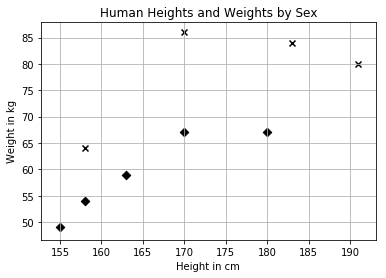

In [17]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])

y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
plt.grid(True)
plt.show()

In [18]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [170,  67]])

In [16]:
y_train

['male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female']

In [30]:
test = np.array([[155, 70]])

distances = np.sqrt(np.sum((X_train - test)**2, axis=1))
distances

array([  6.70820393,  21.9317122 ,  31.30495168,  37.36308338,
        21.        ,  13.60147051,  25.17935662,  16.2788206 ,  15.29705854])

In [19]:
nearest_neighbor_indices = distances.argsort()[:3]
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)
nearest_neighbor_genders

array(['male', 'female', 'female'],
      dtype='<U6')

In [23]:
from collections import Counter

b = Counter(nearest_neighbor_genders)
b

Counter({'female': 2, 'male': 1})

In [26]:
b.most_common()

[('female', 2), ('male', 1)]

In [27]:
b.most_common(1)

[('female', 2)]

In [29]:
b.most_common(1)[0][0]

'female'

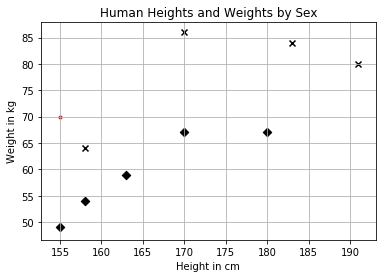

In [36]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])

y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')

plt.scatter(155, 70, c='red', marker='.')

plt.grid(True)
plt.show()

### Scikit-learn Implementation

In [38]:
y_train

['male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female']

In [40]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [42]:
y_train_binarized.reshape(-1)

array([1, 1, 1, 1, 0, 0, 0, 0, 0])

In [43]:
np.array([155, 70]).reshape(1, -1)

array([[155,  70]])

In [45]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
clf = KNeighborsClassifier(n_neighbors=K)

clf.fit(X_train, y_train_binarized.reshape(-1))

prediction_binarized = clf.predict(np.array([155, 70]).reshape(1, -1))[0]
predicted_label = lb.inverse_transform(prediction_binarized)
predicted_label

array(['female'],
      dtype='<U6')

### Testing with a test set

In [47]:
X_test = np.array([
    [168, 65],
    [180, 96],
    [160, 52],
    [169, 67]
])

y_test = ['male', 'male', 'female', 'female']

y_test_binarized = lb.transform(y_test)
print('Binarized labels: %s' % y_test_binarized.T[0])

predictions_binarized = clf.predict(X_test)
print('Binarized predictions: %s' % predictions_binarized)
print('Predicted labels: %s' % lb.inverse_transform(predictions_binarized))

Binarized labels: [1 1 0 0]
Binarized predictions: [0 1 0 0]
Predicted labels: ['female' 'male' 'female' 'female']


In [49]:
from sklearn.metrics import accuracy_score

print('Accuracy: %s' % accuracy_score(y_test_binarized, predictions_binarized))

Accuracy: 0.75


In [51]:
from sklearn.metrics import precision_score

print('Precision: %s' % precision_score(y_test_binarized, predictions_binarized))

Precision: 1.0


In [53]:
from sklearn.metrics import recall_score

print('Recall: %s' % recall_score(y_test_binarized, predictions_binarized))

Recall: 0.5


In [55]:
from sklearn.metrics import f1_score

print('F1 score: %s' % f1_score(y_test_binarized, predictions_binarized))

F1 score: 0.666666666667


In [56]:
from sklearn.metrics import matthews_corrcoef

print('Matthews correlation coefficient: %s' % matthews_corrcoef(y_test_binarized, predictions_binarized))

Matthews correlation coefficient: 0.57735026919


In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test_binarized, predictions_binarized, target_names=['male'], labels=[1]))

             precision    recall  f1-score   support

       male       1.00      0.50      0.67         2

avg / total       1.00      0.50      0.67         2



In [63]:
print(classification_report(y_test_binarized, predictions_binarized))

             precision    recall  f1-score   support

          0       0.67      1.00      0.80         2
          1       1.00      0.50      0.67         2

avg / total       0.83      0.75      0.73         4



### Regression with kNN

In [65]:
from sklearn.neighbors import KNeighborsRegressor

X_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [170, 0]
])

y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([
    [168, 1],
    [180, 1],
    [160, 0],
    [159, 0]
])

y_test = [65, 96, 52, 67]

K = 1
clf = KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
predictions

array([ 86.,  67.,  54.,  54.])

In [67]:
from sklearn.metrics import r2_score

print(r2_score(y_test, predictions))

-0.407156673114


In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

K = 3
clf = KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train, y_train)

predictions = clf.predict(np.array(X_test))

print('Predicted weights: %s' % predictions)
print('Actual weights: %s' % y_test)
print('Mean absolute error: %s' % mean_absolute_error(y_test, predictions))
print('Mean squared error: %s' % mean_squared_error(y_test, predictions))
print('Coefficients of determination: %s' % r2_score(y_test, predictions))


Predicted weights: [ 70.66666667  79.          59.          55.66666667]
Actual weights: [65, 96, 52, 67]
Mean absolute error: 10.25
Mean squared error: 124.638888889
Coefficients of determination: 0.517837954008


### Scaling features